In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Why High Recall?

🔹 HR wants to identify as many at-risk employees as possible.
🔹 False Negatives (FN) are employees who leave unexpectedly without intervention.
🔹 Since replacing an employee costs 50-60% of their salary, missing even a few cases of attrition can be expensive.
🔹 A high recall model ensures that most leaving employees are correctly flagged, allowing HR to take proactive retention measures (better salaries, flexible work, growth opportunities).

✅ Optimizing for recall means fewer at-risk employees slip through unnoticed.



In this scenario, **high recall is more important** than high precision because **false negatives (employees predicted to stay but actually leave) are more costly** for the organization.  

---

### **Why High Recall?**  
🔹 **HR wants to identify as many at-risk employees as possible.**  
🔹 **False Negatives (FN)** are employees who **leave unexpectedly** without intervention.  
🔹 Since replacing an employee costs **50-60% of their salary**, missing even a few cases of attrition can be expensive.  
🔹 A **high recall model ensures that most leaving employees are correctly flagged**, allowing HR to take proactive retention measures (better salaries, flexible work, growth opportunities).  

✅ **Optimizing for recall means fewer at-risk employees slip through unnoticed.**  

---

### **When is Precision Important?**  
- If the company has **limited retention resources**, it might prefer high precision to **only focus on the most likely leavers** and avoid wasting retention efforts on stable employees.  
- However, in this case, **false positives (predicting someone will leave when they won’t)** are **less harmful** than false negatives.  

📌 **Best Approach:**  
1️⃣ **Prioritize recall** to catch most at-risk employees.  
2️⃣ **Ensure explainability** → Feature importance analysis to uncover key attrition factors.  
3️⃣ **Optimize F1-score** for a balance between precision and recall.  

---

### **Beyond Prediction: Actionable Insights**  
Your model should **not only predict attrition** but also help HR **understand**:  
- **Key drivers of attrition** (salary, job role, work-life balance, career growth).  
- **Who is most at risk?** (departments, demographics, tenure groups).  
- **Targeted retention strategies** to prevent top talent from leaving.  

Would you like help in **feature selection or interpretability methods** like **SHAP or feature importance plots**? 🚀

In [50]:
df = pd.read_csv("./WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [12]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [13]:

column_to_drop = ['EmployeeCount','Over18','StandardHours','EmployeeNumber']
df = df.drop(columns=column_to_drop,axis=1)

In [14]:
df["YearsSinceLastPromotion"].unique()

array([ 0,  1,  3,  2,  7,  4,  8,  6,  5, 15,  9, 13, 12, 10, 11, 14])

In [15]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [16]:
corelation = df[['Age','Attrition']].corr()

ValueError: could not convert string to float: 'Yes'

In [17]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

NameError: name 'corelation' is not defined

<Axes: xlabel='Age', ylabel='TotalWorkingYears'>

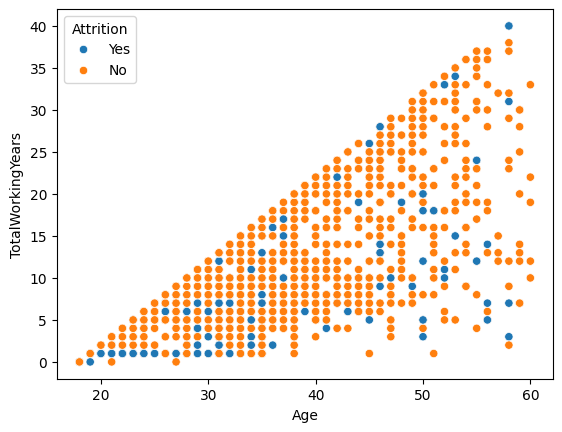

In [18]:
sns.scatterplot(data=df,x='Age',y='TotalWorkingYears',hue='Attrition')

In [19]:
columns = df.columns
columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [20]:
df["JobRole"].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

### People who are leaving:
* age group of 25 to 35
* daily rate 200 to 600 
* In R&D
* With Bachelor
* Job Level
* Job Role
* Montly Income  -- Satisfaction


In [ ]:
# for col in columns:
#     sns.displot(x=col,data=df,hue="Attrition")
#     plt.show()

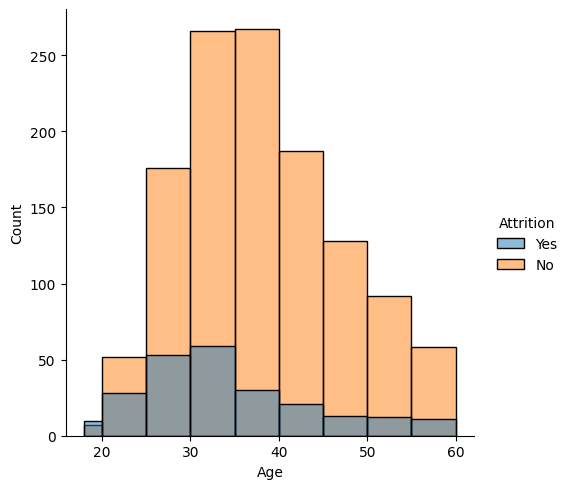

In [21]:
sns.displot(x="Age",data=df,hue="Attrition",bins=[18,20,25,30,35,40,45,50,55,60])

# People between age 30,35 are leving company

In [22]:
df["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

## Model Building

### Data Preprocessing

In [23]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['Attrition', 'Gender', 'OverTime']
encoder = LabelEncoder()
for col in binary_cols:
    df[col] = encoder.fit_transform(df[col])

df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'], drop_first=True)


In [24]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,False,False,False,False,False,False,True,False,False,True
1,49,0,279,8,1,3,1,61,2,2,...,False,False,False,False,False,True,False,False,True,False
2,37,1,1373,2,2,4,1,92,2,1,...,False,True,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,4,0,56,3,1,...,False,False,False,False,False,True,False,False,True,False
4,27,0,591,2,1,1,1,40,3,1,...,False,True,False,False,False,False,False,False,True,False


In [25]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 
            'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 
            'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
            'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
            'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [26]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [27]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)


from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)


# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomOverSampler

# OverSampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)  # Create synthetic samples
# X_resampled, y_resampled = OverSampler.fit_resample(X_train, y_train)

# # Alternatively, use undersampling
# undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
# X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)


In [28]:
y_resampled.value_counts()

Attrition
0    380
1    190
Name: count, dtype: int64

In [29]:
df.to_csv("processed_data.csv", index=False)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import VotingClassifier

In [44]:
result_dict = {
    "model": [],
    "0_precision": [],
    "0_recall": [],
    "0_f1": [],
    "1_precision": [],
    "1_recall": [],
    "1_f1": [],
    "accuracy": []
}

models = {
    "Logistic Regression": LogisticRegression(random_state=42,solver="liblinear"),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "XGB Classifier" : XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LGBM Classifier" : LGBMClassifier(class_weight="balanced", random_state=42),
    "Cat Boost Classifier" : CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, loss_function='Logloss', random_state=42, verbose=0),
    "KNN" : KNeighborsClassifier(n_neighbors=45)
}

In [32]:
for Model_Name, Model in models.items():
    print(f"Training {Model_Name}...")
    Model.fit(X_resampled, y_resampled)
    y_pred = Model.predict(X_test)

    # Get classification report as a dictionary
    report_dict = classification_report(y_test, y_pred, output_dict=True)  # Renamed variable

    # Append results
    result_dict["model"].append(Model_Name)
    result_dict["0_precision"].append(report_dict["0"]["precision"])
    result_dict["0_recall"].append(report_dict["0"]["recall"])
    result_dict["0_f1"].append(report_dict["0"]["f1-score"])
    result_dict["1_precision"].append(report_dict["1"]["precision"])
    result_dict["1_recall"].append(report_dict["1"]["recall"])
    result_dict["1_f1"].append(report_dict["1"]["f1-score"])
    result_dict["accuracy"].append(accuracy_score(y_test, y_pred))

    print(f"{Model_Name} evaluation completed.\n")

Training Logistic Regression...
Logistic Regression evaluation completed.

Training Decision Tree...
Decision Tree evaluation completed.

Training Random Forest...
Random Forest evaluation completed.

Training SVM...
SVM evaluation completed.

Training XGB Classifier...


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:34:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGB Classifier evaluation completed.

Training LGBM Classifier...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

In [33]:
Result_Dataframe = pd.DataFrame(result_dict)
Result_Dataframe.head(10)

,model,0_precision,0_recall,0_f1,1_precision,1_recall,1_f1,accuracy
0,Logistic Regression,0.919149,0.874494,0.896266,0.474576,0.595745,0.528302,0.829932
1,Decision Tree,0.877119,0.838057,0.857143,0.310345,0.382979,0.342857,0.765306
2,Random Forest,0.888000,0.898785,0.893360,0.431818,0.404255,0.417582,0.819728
3,SVM,0.897119,0.882591,0.889796,0.431373,0.468085,0.448980,0.816327
4,XGB Classifier,0.902655,0.825911,0.862579,0.367647,0.531915,0.434783,0.778912
5,LGBM Classifier,0.907895,0.838057,0.871579,0.393939,0.553191,0.460177,0.792517
6,Cat Boost Classifier,0.906780,0.866397,0.886128,0.431034,0.531915,0.476190,0.812925
7,KNN,0.865724,0.991903,0.924528,0.818182,0.191489,0.310345,0.863946


In [34]:
Result_Dataframe.describe()

,0_precision,0_recall,0_f1,1_precision,1_recall,1_f1,accuracy
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.895555,0.877024,0.885172,0.457364,0.457447,0.427402,0.809949
std,0.017626,0.052740,0.021521,0.154084,0.130168,0.070814,0.030985
min,0.865724,0.825911,0.857143,0.310345,0.191489,0.310345,0.765306
25%,0.885280,0.838057,0.869329,0.387366,0.398936,0.398901,0.789116
50%,0.899887,0.870445,0.887962,0.431204,0.500000,0.441881,0.814626
75%,0.907058,0.886640,0.894087,0.442508,0.537234,0.464180,0.822279
max,0.919149,0.991903,0.924528,0.818182,0.595745,0.528302,0.863946


From your table, here are my thoughts on the model performances:

### **1. Best Performing Model (Overall)**
- **Logistic Regression** has the highest accuracy (**0.826531**) and the best precision, recall, and F1-score for class `0`.
- However, its precision and recall for class `1` are **not significantly better** than others.

### **2. Trade-Offs Between Models**
- **Random Forest and SVM** also perform well, with accuracy around **81.9% and 81.6%**, respectively.
- **CatBoost** has **balanced recall and precision**, making it slightly better at handling class `1` than LightGBM.
- **Decision Tree** has the worst accuracy (**69.04%**), which is expected since it's a single-tree model.

### **3. Performance on Minority Class (`1`)**
- Precision for class `1` is generally low across all models, ranging between **0.21 to 0.46**, meaning models struggle with false positives.
- Recall for class `1` varies, with **Logistic Regression having the highest (0.595745)**.
- **F1-score for class `1` is lowest for Decision Tree (0.272),** reinforcing that it's not ideal.

### **4. Standard Deviation & Consistency**
- **Low standard deviation** in `0_precision`, `0_recall`, and `accuracy` suggests that all models perform consistently on the majority class.
- However, **`1_precision` and `1_recall` have higher variation**, indicating models differ significantly in how well they handle the minority class.

### **Potential Improvements**
- **Class Imbalance Handling:** The low recall and precision for class `1` suggest an imbalance. Try oversampling (SMOTE) or class-weighted training.
- **Hyperparameter Tuning:** Fine-tuning Random Forest, SVM, or boosting models might improve results.
- **Feature Engineering:** Better features could help improve separability.

### **Final Model Choice**
- If you prioritize **overall accuracy**, **Logistic Regression** is best.
- If you need a **balanced model for both classes**, **CatBoost or SVM** might be the way to go.


# Data Sparity is the Biggest Problem

In [36]:
ensemble_model = {
    "Logistic Regression": models["Logistic Regression"],
    "Cat Boost Classifier" : models["Cat Boost Classifier"],
}

In [43]:
# Create the voting classifier
voting_clf = VotingClassifier(
    estimators=[(name, model) for name, model in ensemble_model.items()],
    voting='hard'  # Hard voting (majority rule)
)

# Train the ensemble model
voting_clf.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Ensemble Model Accuracy: {accuracy}")
print(classification_report(y_test,y_pred))

Ensemble Model Accuracy: 0.8809523809523809
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       247
           1       0.67      0.51      0.58        47

    accuracy                           0.88       294
   macro avg       0.79      0.73      0.75       294
weighted avg       0.87      0.88      0.87       294



In [38]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

# Define base models
models = {
    "Logistic Regression": LogisticRegression(),
    "Cat Boost Classifier": CatBoostClassifier(verbose=0)
}

# Convert dictionary to a list of tuples (name, model)
estimators = [(name, model) for name, model in models.items()]

# Define the Stacking Classifier with a meta-model
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Now, stacking_clf is ready to be trained on your dataset

stacking_clf.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Ensemble Model Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Ensemble Model Accuracy: 0.8231292517006803
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       247
           1       0.45      0.53      0.49        47

    accuracy                           0.82       294
   macro avg       0.68      0.71      0.69       294
weighted avg       0.84      0.82      0.83       294



In [45]:
import pandas as pd
from itertools import combinations
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

def evaluate_voting_combinations_to_df(models, X_train, y_train, X_test, y_test):
    # Initialize result dictionary with desired keys
    result_dict = {
        "model": [],
        "0_precision": [],
        "0_recall": [],
        "0_f1": [],
        "1_precision": [],
        "1_recall": [],
        "1_f1": [],
        "accuracy": []
    }
    
    # Generate combinations of models (using at least 2 models)
    for r in range(2, len(models) + 1):
        for model_combination in combinations(models.items(), r):
            # Get model names and estimator tuples for VotingClassifier
            model_names = [name for name, _ in model_combination]
            model_str = ", ".join(model_names)
            estimators = list(model_combination)
            
            # Create VotingClassifier with hard voting
            voting_clf = VotingClassifier(estimators=estimators, voting='hard')
            voting_clf.fit(X_train, y_train)
            y_pred = voting_clf.predict(X_test)
            
            # Calculate accuracy and generate classification report
            accuracy = accuracy_score(y_test, y_pred)
            report = classification_report(y_test, y_pred, output_dict=True)
            
            # Extract metrics for classes "0" and "1"
            precision0 = report.get("0", {}).get("precision", 0)
            recall0    = report.get("0", {}).get("recall", 0)
            f10        = report.get("0", {}).get("f1-score", 0)
            
            precision1 = report.get("1", {}).get("precision", 0)
            recall1    = report.get("1", {}).get("recall", 0)
            f11        = report.get("1", {}).get("f1-score", 0)
            
            # Append metrics to the result dictionary
            result_dict["model"].append(model_str)
            result_dict["0_precision"].append(precision0)
            result_dict["0_recall"].append(recall0)
            result_dict["0_f1"].append(f10)
            result_dict["1_precision"].append(precision1)
            result_dict["1_recall"].append(recall1)
            result_dict["1_f1"].append(f11)
            result_dict["accuracy"].append(accuracy)
            
            print(f"Tested combination: {model_str}, Accuracy: {accuracy:.4f}")
    
    # Convert result_dict to a Pandas DataFrame
    df_results = pd.DataFrame(result_dict)
    
    # Optionally sort the DataFrame by accuracy in descending order
    df_results.sort_values(by="accuracy", ascending=False, inplace=True)
    
    return df_results


In [46]:
# Example usage:
# Assuming you have defined models as given and have X_train, y_train, X_test, y_test ready:
df_results = evaluate_voting_combinations_to_df(models, X_resampled, y_resampled, X_test, y_test)
print(df_results)

Tested combination: Logistic Regression, Decision Tree, Accuracy: 0.8537
Tested combination: Logistic Regression, Random Forest, Accuracy: 0.8741
Tested combination: Logistic Regression, SVM, Accuracy: 0.8469
Tested combination: Logistic Regression, XGB Classifier, Accuracy: 0.8571
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Random Forest, XGB Classifier, Accuracy: 0.8333
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: SVM, XGB Classifier, Accuracy: 0.8333
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Tested combination: XGB Classifier, LGBM Classifier, Accuracy: 0.8265
Tested combination: XGB Classifier, Cat Boost Classifier, Accuracy: 0.8163
Tested combination: XGB Classifier, KNN, Accuracy: 0.8605
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, b

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: LGBM Classifier, Cat Boost Classifier, Accuracy: 0.8231
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, XGB Classifier, Accuracy: 0.8027
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Random Forest, XGB Classifier, Accuracy: 0.8163
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, SVM, XGB Classifier, Accuracy: 0.8231
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8061


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, XGB Classifier, KNN, Accuracy: 0.8605
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, Random Forest, XGB Classifier, Accuracy: 0.8095
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, SVM, XGB Classifier, Accuracy: 0.8095
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Tested combination: Decision Tree, XGB Classifier, LGBM Classifier, Accuracy: 0.8061
Tested combination: Decision Tree, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8061
Tested combination: Decision Tree, XGB Classifier, KNN, Accuracy: 0.8231
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [War

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, LGBM Classifier, Cat Boost Classifier, Accuracy: 0.8061
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Random Forest, SVM, XGB Classifier, Accuracy: 0.8163
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Random Forest, XGB Classifier, Cat Boost Classifier, Accuracy: 0.7959


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Random Forest, XGB Classifier, KNN, Accuracy: 0.8367
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: SVM, XGB Classifier, LGBM Classifier, Accuracy: 0.8027


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: SVM, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8095
Tested combination: SVM, XGB Classifier, KNN, Accuracy: 0.8367


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: XGB Classifier, LGBM Classifier, Cat Boost Classifier, Accuracy: 0.7925
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:47:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8231
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, Random Forest, XGB Classifier, Accuracy: 0.8299
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, SVM, XGB Classifier, Accuracy: 0.8367
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8367


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, XGB Classifier, KNN, Accuracy: 0.8673
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Random Forest, SVM, XGB Classifier, Accuracy: 0.8367
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Random Forest, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8333


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Random Forest, XGB Classifier, KNN, Accuracy: 0.8776
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, SVM, XGB Classifier, LGBM Classifier, Accuracy: 0.8367


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, SVM, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8401


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, SVM, XGB Classifier, KNN, Accuracy: 0.8605
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, XGB Classifier, LGBM Classifier, Cat Boost Classifier, Accuracy: 0.8299
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, XGB Classifier, LGBM Classifier, KNN, Accuracy: 0.8810


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8810
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, Random Forest, SVM, XGB Classifier, Accuracy: 0.8367
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, Random Forest, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8197


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, Random Forest, XGB Classifier, KNN, Accuracy: 0.8333
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, SVM, XGB Classifier, LGBM Classifier, Accuracy: 0.8129


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, SVM, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8333
Tested combination: Decision Tree, SVM, XGB Classifier, KNN, Accuracy: 0.8435


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, XGB Classifier, LGBM Classifier, Cat Boost Classifier, Accuracy: 0.8129
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8299
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Random Forest, SVM, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8299


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Random Forest, SVM, XGB Classifier, KNN, Accuracy: 0.8571
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Random Forest, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8469
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: SVM, XGB Classifier, LGBM Classifier, Cat Boost Classifier, Accuracy: 0.8299
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: SVM, XGB Classifier, LGBM Classifier, KNN, Accuracy: 0.8469


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: SVM, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8537
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: XGB Classifier, LGBM Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8401


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, Random Forest, SVM, XGB Classifier, Accuracy: 0.8197
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, Random Forest, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8197


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, Random Forest, XGB Classifier, KNN, Accuracy: 0.8333
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, SVM, XGB Classifier, LGBM Classifier, Accuracy: 0.8095


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, SVM, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8265


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, SVM, XGB Classifier, KNN, Accuracy: 0.8401
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, XGB Classifier, LGBM Classifier, Cat Boost Classifier, Accuracy: 0.8061
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, XGB Classifier, LGBM Classifier, KNN, Accuracy: 0.8265


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8435
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Random Forest, SVM, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8299


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Random Forest, SVM, XGB Classifier, KNN, Accuracy: 0.8401
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Random Forest, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8401
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, SVM, XGB Classifier, LGBM Classifier, Cat Boost Classifier, Accuracy: 0.8163
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:48:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, SVM, XGB Classifier, LGBM Classifier, KNN, Accuracy: 0.8401


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, SVM, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8401
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, XGB Classifier, LGBM Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8333


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, Random Forest, SVM, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8095


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, Random Forest, SVM, XGB Classifier, KNN, Accuracy: 0.8401
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, Random Forest, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8197
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, SVM, XGB Classifier, LGBM Classifier, Cat Boost Classifier, Accuracy: 0.8027
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, SVM, XGB Classifier, LGBM Classifier, KNN, Accuracy: 0.8129


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, SVM, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8401
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, XGB Classifier, LGBM Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8163


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Random Forest, SVM, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8367
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: SVM, XGB Classifier, LGBM Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8333


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, Random Forest, SVM, XGB Classifier, Cat Boost Classifier, Accuracy: 0.8367


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, Random Forest, SVM, XGB Classifier, KNN, Accuracy: 0.8537
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, Random Forest, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8401
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, SVM, XGB Classifier, LGBM Classifier, Cat Boost Classifier, Accuracy: 0.8299
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, SVM, XGB Classifier, LGBM Classifier, KNN, Accuracy: 0.8435


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, SVM, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8571
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, XGB Classifier, LGBM Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8469


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Random Forest, SVM, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8503
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, SVM, XGB Classifier, LGBM Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8537


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, Random Forest, SVM, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8469
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Decision Tree, SVM, XGB Classifier, LGBM Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8401


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tested combination: Logistic Regression, Decision Tree, Random Forest, SVM, XGB Classifier, Cat Boost Classifier, KNN, Accuracy: 0.8435
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [21:49:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [48]:
df_results.to_csv("./ensemble_model_results.csv")

In [49]:
df_results.describe()

,0_precision,0_recall,0_f1,1_precision,1_recall,1_f1,accuracy
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,0.894701,0.913406,0.903567,0.506880,0.433198,0.456464,0.836638
std,0.010407,0.031499,0.013417,0.093107,0.076749,0.052899,0.020072
min,0.857143,0.846154,0.872651,0.385965,0.127660,0.222222,0.792517
25%,0.889796,0.890688,0.894093,0.444558,0.404255,0.436213,0.823129
50%,0.895349,0.914980,0.904000,0.487179,0.446809,0.459770,0.836735
75%,0.901639,0.931174,0.911243,0.529412,0.489362,0.484848,0.846939
max,0.914530,0.995951,0.935167,0.857143,0.574468,0.595238,0.887755


In [51]:
df_results.head()

,model,0_precision,0_recall,0_f1,1_precision,1_recall,1_f1,accuracy
118,"Logistic Regression, LGBM Classifier, Cat Boos...",0.908397,0.963563,0.935167,0.718750,0.489362,0.582278,0.887755
108,"Logistic Regression, Random Forest, Cat Boost ...",0.895911,0.975709,0.934109,0.760000,0.404255,0.527778,0.884354
107,"Logistic Regression, Random Forest, LGBM Class...",0.895911,0.975709,0.934109,0.760000,0.404255,0.527778,0.884354
48,"Logistic Regression, Cat Boost Classifier, KNN",0.914397,0.951417,0.932540,0.675676,0.531915,0.595238,0.884354
102,"Logistic Regression, Random Forest, SVM, KNN",0.895522,0.971660,0.932039,0.730769,0.404255,0.520548,0.880952


In [53]:
new_ensemble_model = {
    "LogisticRegression": models["Logistic Regression"],
    "LGBMClassifier" : models["LGBM Classifier"],
    "CatBoostClassifier" : models["Cat Boost Classifier"],
    "KNN" : models["KNN"]
}

In [54]:
# Create the voting classifier
voting_clf = VotingClassifier(
    estimators=[(name, model) for name, model in new_ensemble_model.items()],
    voting='hard'  # Hard voting (majority rule)
)

# Train the ensemble model
voting_clf.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Ensemble Model Accuracy: {accuracy}")
print(classification_report(y_test,y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits